In [2]:
import numpy as np
import pandas as pd
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### Dickey-Fuller Test for Stationarity
Dickey-Fuller test is a hypothesis test which directly returns a p-value where id the value is smaller than 0.05 we reject the null hypothesis.

### Granger Causality Tests
These tests are used to identify if a time-series is useful inf forecasting another time-series and establishing causality between the two.

### AIC vs BIC
https://medium.com/swlh/what-do-we-see-with-aic-bic-57b3e12685d <br>
AIC peanalizes the use of more parameters to avoid overfitting. <br>
BIC is similar to AIC but it uses a bayesian criterion.

In [3]:
# read airlines data (seasonal)
df_air = pd.read_csv('Data/airline_passengers.csv', index_col = 'Month', parse_dates=True)
df_air.index.freq = 'MS'

# read birth data (non-seasonal)
df_bir = pd.read_csv('Data/DailyTotalFemaleBirths.csv', index_col='Date', parse_dates=True)
df_bir.index.freq = 'D'

<Axes: xlabel='Month'>

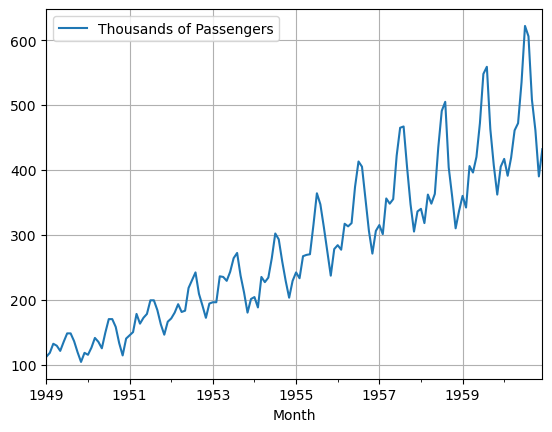

In [4]:
df_air.plot(grid = True)

### Augmented Dickey Fuller Test

In [5]:
from statsmodels.tsa.stattools import adfuller

In [6]:
adfuller(df_air['Thousands of Passengers'])

(0.8153688792060423,
 0.9918802434376409,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.6929308390189)

In [7]:
help(adfuller)

Help on function adfuller in module statsmodels.tsa.stattools:

adfuller(x, maxlag: 'int | None' = None, regression='c', autolag='AIC', store=False, regresults=False)
    Augmented Dickey-Fuller unit root test.
    
    The Augmented Dickey-Fuller test can be used to test for a unit root in a
    univariate process in the presence of serial correlation.
    
    Parameters
    ----------
    x : array_like, 1d
        The data series to test.
    maxlag : {None, int}
        Maximum lag which is included in test, default value of
        12*(nobs/100)^{1/4} is used when ``None``.
    regression : {"c","ct","ctt","n"}
        Constant and trend order to include in regression.
    
        * "c" : constant only (default).
        * "ct" : constant and trend.
        * "ctt" : constant, and linear and quadratic trend.
        * "n" : no constant, no trend.
    
    autolag : {"AIC", "BIC", "t-stat", None}
        Method to use when automatically determining the lag length among the
      

In [8]:
dftest = adfuller(df_air['Thousands of Passengers'])
dfout = pd.Series(dftest[0:4], index=[['ADF test Statistic', 'p-value', '# Lags Used', '# Observations']])

In [9]:
for key,val in dftest[4].items():
    dfout[f'cricital value ({key})'] = val

In [10]:
dfout

ADF test Statistic        0.815369
p-value                   0.991880
# Lags Used              13.000000
# Observations          130.000000
cricital value (1%)      -3.481682
cricital value (5%)      -2.884042
cricital value (10%)     -2.578770
dtype: float64

Since the p-value is greater than 0.05 we can reject the null hypothesis which means thaat the data is non-stationary.

In [14]:
from statsmodels.tsa.stattools import adfuller

# function for generating ADF interpretation report
def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print('\nConclusion:')
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print('\nConclusion:')
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

### ADF Test for Airline Data

In [15]:
adf_test(df_air['Thousands of Passengers'])

Augmented Dickey-Fuller Test: 
ADF test statistic        0.815369
p-value                   0.991880
# lags used              13.000000
# observations          130.000000
critical value (1%)      -3.481682
critical value (5%)      -2.884042
critical value (10%)     -2.578770

Conclusion:
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


### ADF For Births Data

In [ ]:
df_